# ABS Monthly Building Approvals 8731

## Python set-up

In [1]:
# system imports
import sys

# analytic imports
import pandas as pd
import matplotlib.pyplot as plt

# local imports
from abs_data_capture import (
    get_fs_constants,
    get_ABS_meta_and_data,
    get_plot_constants,
    get_identifier,
    clear_cache,
)
from plotting import (
    finalise_plot,
    recalibrate,
    clear_chart_dir,
    set_chart_dir,
    seas_trend_plot,
)

# pandas display settings
pd.options.display.max_rows = None
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 999

# display charts in this notebook
SHOW = False

## Get data from ABS

In [2]:
# in case of emergency
if False:
    clear_cache()

In [3]:
# do the data capture and extraction
catalogue_id = "8731"
source, CHART_DIR, META_DATA = get_fs_constants(catalogue_id)

abs_m = get_ABS_meta_and_data(catalogue_id, verbose=False)
if abs_m is None:
    sys.exit(-1)

meta_m = abs_m[META_DATA]
RECENT, plot_times, plot_tags = get_plot_constants(meta_m)

Found URL for a ZIP file on ABS web page
Retrieving zip-file from cache ...
Extracting DataFrames from the zip-file ...


## Plot

### Set-up some constants we will use across all plots

In [4]:
clear_chart_dir(CHART_DIR)
set_chart_dir(CHART_DIR)
plt.style.use("fivethirtyeight")

### Headline charts

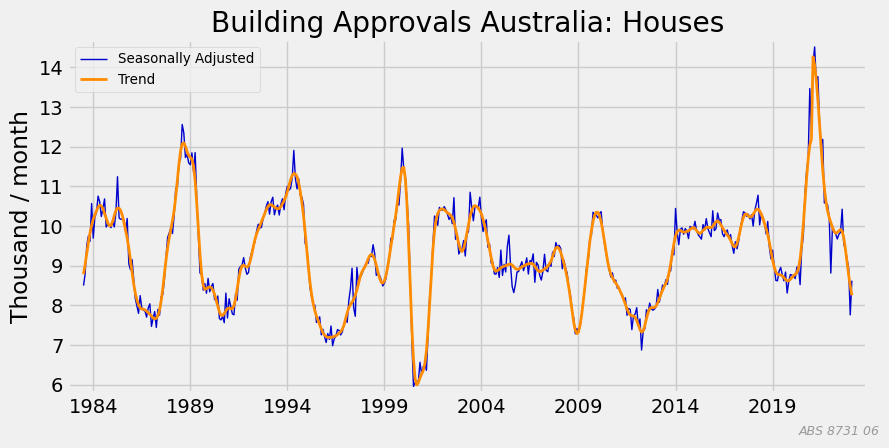

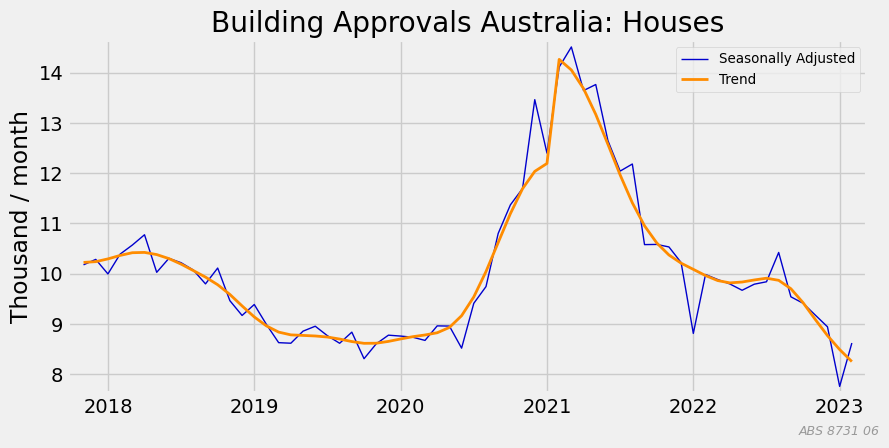

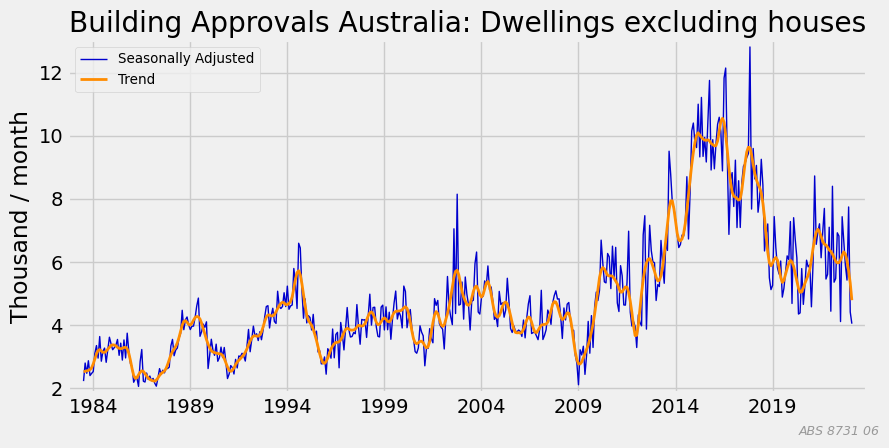

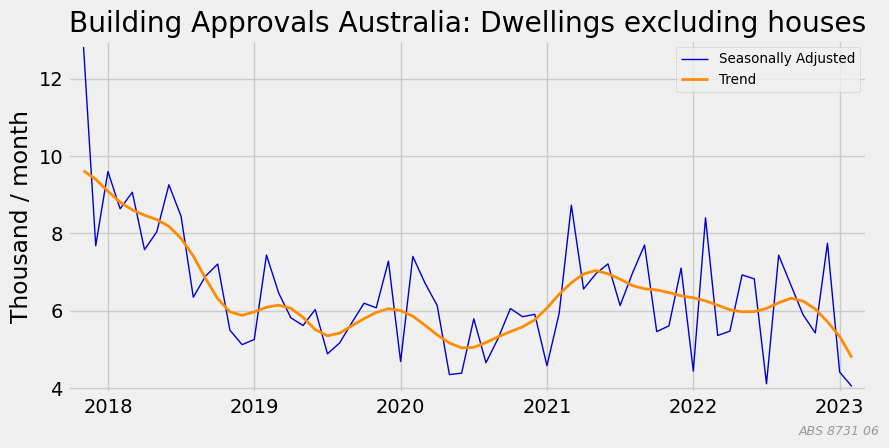

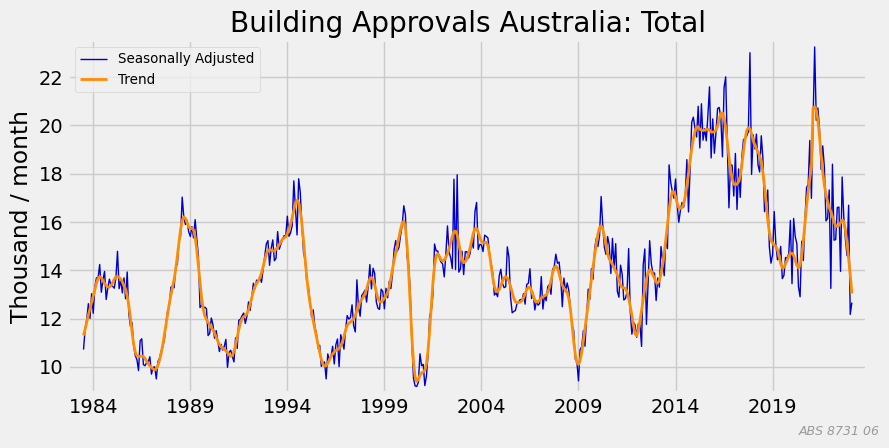

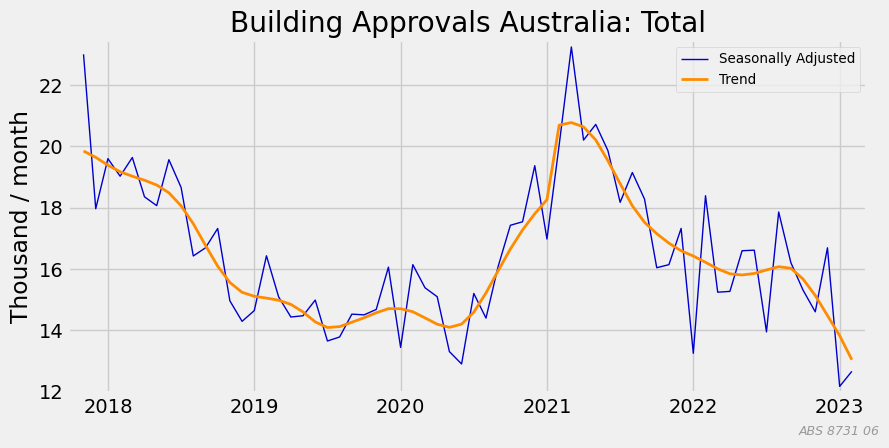

In [5]:
table = "06"
df = abs_m[table]

total = (
    "Total number of dwelling units ;  " "Total (Type of Building) ;  Total Sectors ;"
)
houses = "Total number of dwelling units ;  Houses ;  Total Sectors ;"
units = (
    "Total number of dwelling units ;  " "Dwellings excluding houses ;  Total Sectors ;"
)
plot_set = [houses, units, total]

for element in plot_set:
    f = pd.DataFrame()
    for series_type in "Seasonally Adjusted", "Trend":
        id, units = get_identifier(meta_m, element, series_type, table)
        f[series_type] = df[id]
    f, units = recalibrate(f, units)

    e = element.replace(" ;  Total Sectors ;", "")
    e = e.replace("Total number of dwelling units ;  ", "")
    e = e.replace(" (Type of Building)", "")
    title = f"Building Approvals Australia: {e}"

    seas_trend_plot(
        f,
        starts=plot_times,
        tags=plot_tags,
        title=title,
        ylabel=f"{units} / month",
        rfooter=f"{source} {table}",
        show=SHOW,
    )

## Finished

In [6]:
# watermark
%load_ext watermark
%watermark -u -n -t -v -iv -w

Last updated: Tue Apr 04 2023 08:24:54

Python implementation: CPython
Python version       : 3.11.2
IPython version      : 8.12.0

matplotlib: 3.7.1
sys       : 3.11.2 | packaged by conda-forge | (main, Mar 31 2023, 17:54:27) [Clang 14.0.6 ]
pandas    : 2.0.0

Watermark: 2.3.1



In [7]:
print("Finished")

Finished
